In [4]:
pip install weave

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
  Using cached wandb-0.17.5-py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 23.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gql[requests] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s e

In [5]:
pip install wandb

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: isaacmwongela71 (isaacmwongela71-united-states-international-university-a5732). Use `wandb login --relogin` to force relogin


<ipython-input-6-f8655bbe5666>:29: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  phishing = pd.read_csv(io.StringIO(decoded_data), on_bad_lines='skip')


                                              domain   ranking mld_res  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000     1.0   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000     0.0   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000     0.0   
3  mail.printakid.com/www.online.americanexpress....  10000000     0.0   
4  thewhiskeydregs.com/wp-content/themes/widescre...  10000000     0.0   

  mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0        0.0      18.0  107.611111  107.277778         0.0         0.0   
1        0.0      11.0  150.636364  152.272727         0.0         0.0   
2        0.0      14.0   73.500000   72.642857         0.0         0.0   
3        0.0       6.0  562.000000  590.666667         0.0         0.0   
4        0.0       8.0   29.000000   24.125000         0.0         0.0   

   jaccard_AR  jaccard_AA jaccard_ARrd jaccard_ARrem  label  
0         0.0         0.0          0.8      0.79

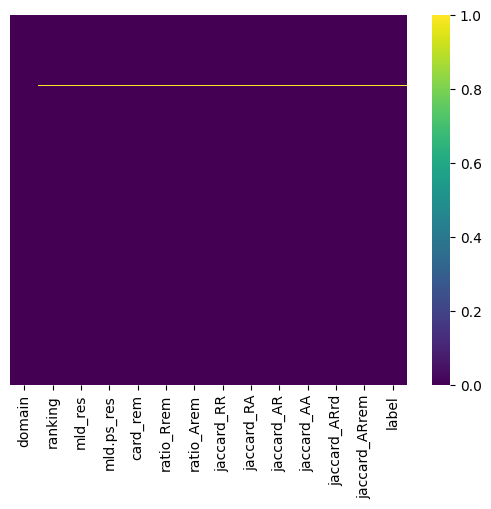

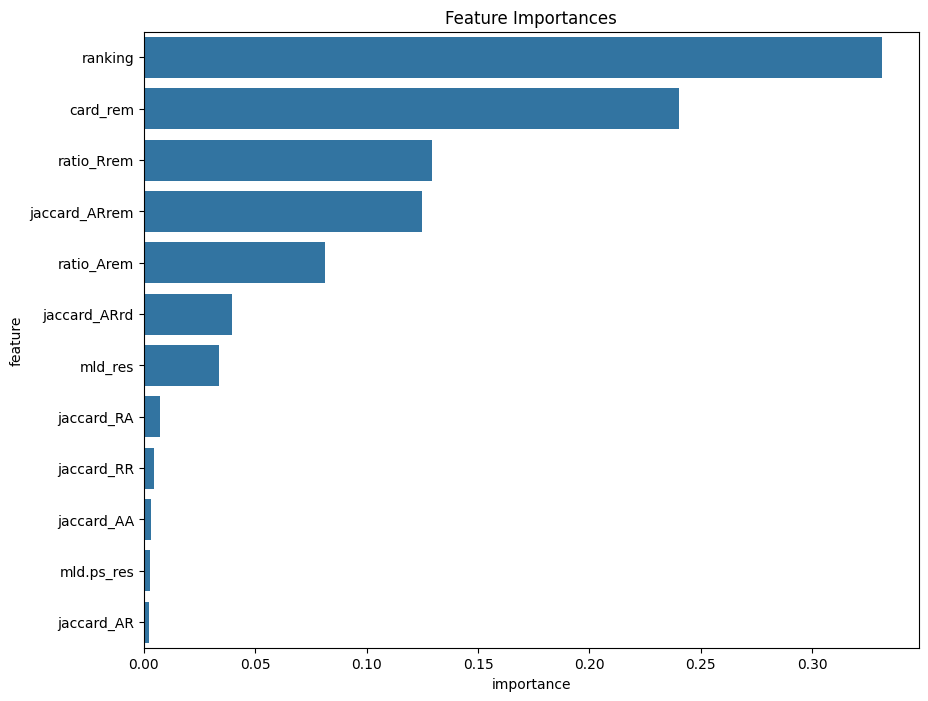

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.133626 to fit

Logistic Regression Accuracy: 0.50
Accuracy on test data with Decision Tree: 0.50
Accuracy on test data with Logistic Regression: 1.00


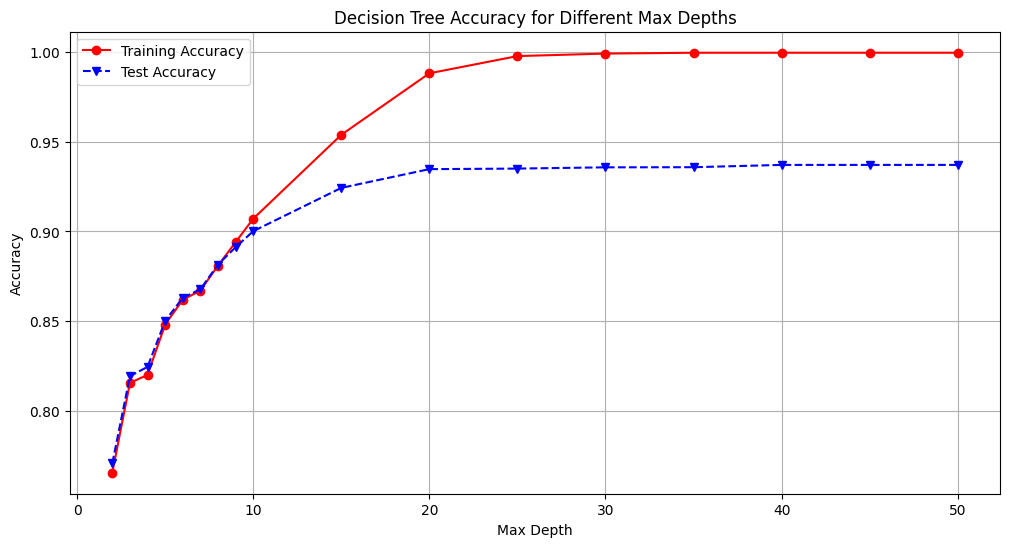

In [6]:

import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from IPython.display import Image, display, Markdown
import graphviz
import pydotplus
import io

%matplotlib inline

# Initialize wandb
wandb.login()
run = wandb.init(project="urlset-classification")

# Read the file in binary mode
csv_file_path = '/content/urlset.csv'
with open(csv_file_path, 'rb') as file:
    raw_data = file.read()

decoded_data = raw_data.decode('MacRoman', errors='replace')

# Use io.StringIO
phishing = pd.read_csv(io.StringIO(decoded_data), on_bad_lines='skip')

# Display basic info
print(phishing.head())
print(phishing.shape)
print(phishing.tail())
print(phishing.isnull().sum())

# Visualize missing data
sns.heatmap(phishing.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# Drop non-numeric columns and handle missing values
phishing = phishing.drop(columns=['domain'])

# Define a function to clean non-numeric values
def clean_column(column, default_value):
    column = pd.to_numeric(column, errors='coerce')
    column = column.fillna(default_value)
    return column

# Apply cleaning function to necessary columns
phishing['ranking'] = clean_column(phishing['ranking'], 10000000)
phishing['mld_res'] = clean_column(phishing['mld_res'], 0)
phishing['mld.ps_res'] = clean_column(phishing['mld.ps_res'], 0)
phishing['card_rem'] = clean_column(phishing['card_rem'], 6)
phishing['ratio_Rrem'] = clean_column(phishing['ratio_Rrem'], 152.674)
phishing['ratio_Arem'] = clean_column(phishing['ratio_Arem'], 82)
phishing['jaccard_RR'] = clean_column(phishing['jaccard_RR'], 0)
phishing['jaccard_RA'] = clean_column(phishing['jaccard_RA'], 0)
phishing['jaccard_AR'] = clean_column(phishing['jaccard_AR'], 0)
phishing['jaccard_AA'] = clean_column(phishing['jaccard_AA'], 0)
phishing['jaccard_ARrd'] = clean_column(phishing['jaccard_ARrd'], 0)
phishing['jaccard_ARrem'] = clean_column(phishing['jaccard_ARrem'], 0)
phishing['label'] = clean_column(phishing['label'], 0).astype(int)

# Ensure all data is numeric
phishing = phishing.apply(pd.to_numeric, errors='coerce')

# Separate features and target
X = phishing.drop('label', axis=1)
y = phishing['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
wandb.log({"decision_tree_accuracy": accuracy_dt})

importances = clf_dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Visualize the Decision Tree
dot_data = export_graphviz(clf_dt, feature_names=X.columns,
                           class_names=['non-phishing', 'phishing'],
                           filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
Image("decision_tree.png")

# Logistic Regression Classifier
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
wandb.log({"logistic_regression_accuracy": accuracy_lr})

# Sample test data
testData = [
    [2567, 0, 0, 10.0, 60.076923, 60.153846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.722832, 1],
    [1177, 0, 0, 11.0, 150.636364, 152.272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.768577, 1],
    [10000000, 0, 0, 14.0, 73.500000, 72.642857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.726582, 1],
    [46091, 0, 0, 6.0, 562.000000, 590.666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.85964, 1]
]

columns_to_use = ['ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem', 'ratio_Arem',
                  'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem']

testData = pd.DataFrame(testData, columns=columns_to_use + ['label'])

testY = testData['label']
testX = testData.drop(['label'], axis=1)

# Predictions using Decision Tree
predY_dt = clf_dt.predict(testX)
predictions_dt = pd.concat([testData.reset_index(drop=True), pd.Series(predY_dt, name='Predicted Class')], axis=1)
accuracy_test_dt = accuracy_score(testY, predY_dt)
print(f'Accuracy on test data with Decision Tree: {accuracy_test_dt:.2f}')
wandb.log({"test_accuracy_decision_tree": accuracy_test_dt})

# Predictions using Logistic Regression
predY_lr = clf_lr.predict(testX)
predictions_lr = pd.concat([testData.reset_index(drop=True), pd.Series(predY_lr, name='Predicted Class')], axis=1)
accuracy_test_lr = accuracy_score(testY, predY_lr)
print(f'Accuracy on test data with Logistic Regression: {accuracy_test_lr:.2f}')
wandb.log({"test_accuracy_logistic_regression": accuracy_test_lr})

# Decision Tree Depth Analysis
maxDepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = np.zeros(len(maxDepths))
testAcc = np.zeros(len(maxDepths))
index = 0

for depth in maxDepths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)  # Training data accuracy
    testAcc[index] = accuracy_score(y_test, Y_predTest)     # Test data accuracy
    wandb.log({f"train_accuracy_depth_{depth}": trainAcc[index],
               f"test_accuracy_depth_{depth}": testAcc[index]})
    index += 1

plt.figure(figsize=(12, 6))
plt.plot(maxDepths, trainAcc, 'ro-', maxDepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Different Max Depths')
plt.grid(True)
plt.show()

# Display analysis of optimum depth
testAcc_max = testAcc.max()

In [7]:
wandb.finish()
print(testAcc_max)

decision_tree_accuracy,▁
logistic_regression_accuracy,▁
test_accuracy_decision_tree,▁
test_accuracy_depth_10,▁
test_accuracy_depth_15,▁
test_accuracy_depth_2,▁
test_accuracy_depth_20,▁
test_accuracy_depth_25,▁
test_accuracy_depth_3,▁
test_accuracy_depth_30,▁
test_accuracy_depth_35,▁


0.9370529824317756
